# Analysis of World Population Data
## Introduction
As of January 2022,the world population is estimated to be slightly above **7.2 billion** people.This statistic takes into consideration data from all the countries in the world.This data includes the area covered by a country,it's population growth rate,birth rate,death rate and the net rate of migration from of the country.We are going to derive  important population data insights from the population dataset. 
![](https://cdn.britannica.com/94/75394-050-395963DC/World-map-Continents-Oceans-Seas.jpg)


 ### Aim
 Our aim is to get important insights to be used in solving population related problems.
 
 >To achieve this goal we are going to use python libraries like `pandas`, `numpy` and `matplotlib`
 
 
 
 ## 1.1 Importing necessary libraries
 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

## 1.2 Reading the  dataset

In [2]:
#reading our dataset and converting it to a dataframe
population_data = pd.read_csv("world_population.xls")
population_data = pd.DataFrame(population_data)

#displaying a few rows
population_data.head(10)


,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230.0,652230.0,0.0,32564342.0,2.32,38.57,13.89,1.51
1,2,al,Albania,28748.0,27398.0,1350.0,3029278.0,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741.0,2381741.0,0.0,39542166.0,1.84,23.67,4.31,0.92
3,4,an,Andorra,468.0,468.0,0.0,85580.0,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700.0,1246700.0,0.0,19625353.0,2.78,38.78,11.49,0.46
5,6,ac,Antigua and Barbuda,442.0,442.0,0.0,92436.0,1.24,15.85,5.69,2.21
6,7,ar,Argentina,2780400.0,2736690.0,43710.0,43431886.0,0.93,16.64,7.33,0.00
7,8,am,Armenia,29743.0,28203.0,1540.0,3056382.0,0.15,13.61,9.34,5.80
8,9,as,Australia,7741220.0,7682300.0,58920.0,22751014.0,1.07,12.15,7.14,5.65
9,10,au,Austria,83871.0,82445.0,1426.0,8665550.0,0.55,9.41,9.42,5.56


In [3]:
# Finding the original shape of our dataframe
population_data.shape

(261, 11)

Our dataset has 261 rows and 11 columns

Here is the description of some of the columns.

* `name`- the name of the country
* `area`- the country's total area(both land and water)
* `area_land`- the country's land area in square kilometres
* `area_water`- the country's water area in square kilometres
* `population` - the country's population
* `population_growth`-the country's population growth as a percentage
* `birth_rate`-the country's birth rate(the number of births per year petr 1000 people)
* `death_rate`- the country's death rate(the number of deaths per year per 1000 people)

## 1.3 Population summary statistics
Let's start by calculating some summary statistics and look for any outlier countries

In [4]:
print("Highest population:",population_data["population"].max())
print("lowest population:",population_data["population"].min())
print("highest population growth:",population_data["population_growth"].max())
print("lowest population growth:",population_data["population_growth"].min())

Highest population: 7256490011.0
lowest population: 0.0
highest population growth: 4.02
lowest population growth: 0.0


We see that:
* There's a country with a population of 0
* There's a country with more than **7.2 billion** people

Let's check on these countries

In [5]:
population_data[["name","population"]].sort_values("population",ascending = False).dropna()

,name,population
260,World,7.256490e+09
36,China,1.367485e+09
76,India,1.251696e+09
196,European Union,5.139494e+08
185,United States,3.213689e+08
...,...,...
219,Niue,1.190000e+03
189,Holy See (Vatican City),8.420000e+02
199,Cocos (Keeling) Islands,5.960000e+02
237,Pitcairn Islands,4.800000e+01


Hence **7,256,490,011** is the population of the whole world so we will not include it when checking on the most populated country.We also confirm that Antarctica has no population at all since it has no permanent human inhabitation.You can check this [here](https://explore.quarkexpeditions.com/blog/what-makes-up-antarctica).

Having known this we are going to drop the row for the whole world and that of Antarctica.

# 2.Data Cleaning

In [6]:
# dropping World and Antarctica rows
population_data = population_data[(population_data["name"] != "World") & (population_data["name"] != "Antarctica")]

#confirming new maximum and minimum population
print(population_data["population"].max())
print(population_data["population"].min())

1367485388.0
48.0


We are also going to drop a few rows and columns which are not helpful in my analysis.The columns include `id` and `code` columns while the rows include the `countries` whose `population` column has a null value or has a value more than `2000000000`.This is because,historically,no country has a population of more than 2 billion people unless it is a union of countries.


In [7]:
#dropping the id column
population_data.drop("id",inplace = True,axis = 1)

#dropping the code column
population_data.drop("code",inplace = True,axis = 1)

#confirming deletion of the id and code columns
population_data.shape                   

(259, 9)

### 2.1 Checking for countries whose population is null

In [8]:
#finding the number of countries whose population is null
print(population_data["population"].isna().sum())
population_data[population_data["population"].isna()]

19


,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
197,Ashmore and Cartier Islands,5.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN
200,Coral Sea Islands,3.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN
201,Heard Island and McDonald Islands,412.0,412.0,0.0,NaN,NaN,NaN,NaN,NaN
207,Clipperton Island,6.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN
209,French Southern and Antarctic Lands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,Bouvet Island,49.0,49.0,0.0,NaN,NaN,NaN,NaN,NaN
222,Jan Mayen,377.0,377.0,0.0,NaN,NaN,NaN,NaN,NaN
227,British Indian Ocean Territory,54400.0,60.0,54340.0,NaN,NaN,NaN,NaN,NaN
239,South Georgia and South Sandwich Islands,3903.0,3903.0,0.0,NaN,NaN,NaN,NaN,NaN
243,Navassa Island,5.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN


From the results above we can confirm that 19 countries had a null entry in the `population` column.Most of these countries are islands and oceans which have no inhabitants.
We are going to drop this countries from our data.

In [9]:
# dropping the countries where the population column has a null value
population_data = population_data[population_data["population"].notnull()]
population_data["population"] = population_data["population"].astype(int)
population_data

,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,Afghanistan,652230.0,652230.0,0.0,32564342,2.32,38.57,13.89,1.51
1,Albania,28748.0,27398.0,1350.0,3029278,0.30,12.92,6.58,3.30
2,Algeria,2381741.0,2381741.0,0.0,39542166,1.84,23.67,4.31,0.92
3,Andorra,468.0,468.0,0.0,85580,0.12,8.13,6.96,0.00
4,Angola,1246700.0,1246700.0,0.0,19625353,2.78,38.78,11.49,0.46
...,...,...,...,...,...,...,...,...,...
245,Puerto Rico,13791.0,8870.0,4921.0,3598357,0.60,10.86,8.67,8.15
246,Virgin Islands,1910.0,346.0,1564.0,103574,0.59,10.31,8.54,7.67
250,Gaza Strip,360.0,360.0,0.0,1869055,2.81,31.11,3.04,0.00
253,West Bank,5860.0,5640.0,220.0,2785366,1.95,22.99,3.50,0.00


## 3. Data Analysis

### 3.1.1 Top 10 countries with the highest population

In [10]:
# Finding the countries with the highest population
population_data.sort_values("population",ascending = False,inplace = True)
country_pop = population_data[["name","population"]]
country_pop = country_pop[country_pop["name"] != "European Union"]
country_pop.head(10)

,name,population
36,China,1367485388
76,India,1251695584
185,United States,321368864
77,Indonesia,255993674
23,Brazil,204259812
131,Pakistan,199085847
128,Nigeria,181562056
13,Bangladesh,168957745
142,Russia,142423773
84,Japan,126919659


<BarContainer object of 10 artists>

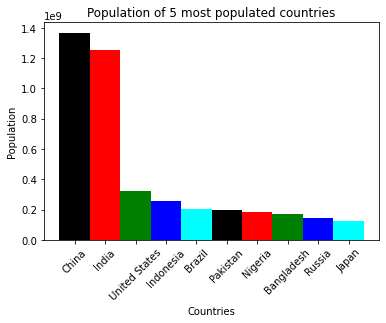

In [11]:
#Visualizing of the most populated countries
plt.xticks(rotation = '45')
plt.title('Population of 5 most populated countries')
plt.xlabel('Countries')
plt.ylabel('Population')
plt.bar(country_pop['name'].head(10),
        country_pop['population'].head(10),width = 1.0,
        color=['black', 'red', 'green', 'blue', 'cyan'])


The most populated country in the world is **China** with a population of **1367485388**.This is because after World War II,Chinese families were encouraged to have as many children as possible in order to bring more money into the country,building a better army and producing more food.You can check this [here](https://www.businessinsider.com/chinas-over-crowded-population-2016-3?r=US&IR=T#overpopulation-in-china-began-after-world-war-ii-in-1949-when-chinese-families-were-encouraged-to-have-as-many-children-as-possible-in-hopes-of-bringing-more-money-to-the-country-building-a-better-army-and-producing-more-food-1)
The second most populated country is **India** and its followed by **US**,**Indonesia** and **Brazil** with each having less than a quarter of **India's** population.
![](https://i.pinimg.com/originals/2a/6f/2e/2a6f2efbe547f299159f62007144651c.jpg)

###  3.1.2 Bottom five countries with lowest population

In [12]:
country_pop = country_pop.sort_values("population").head()
country_pop

,name,population
237,Pitcairn Islands,48
199,Cocos (Keeling) Islands,596
189,Holy See (Vatican City),842
219,Niue,1190
220,Tokelau,1337


<BarContainer object of 5 artists>

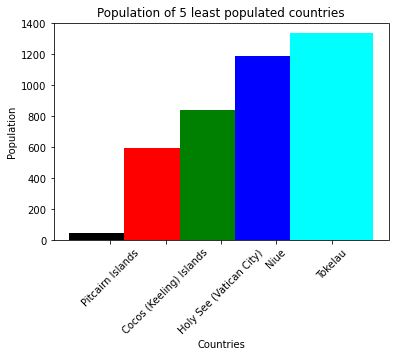

In [13]:
plt.xticks(rotation = '45')
plt.title('Population of 5 least populated countries')
plt.xlabel('Countries')
plt.ylabel('Population')
plt.bar(country_pop['name'],
        country_pop['population'],width = 1.5,color=['black', 'red', 'green', 'blue', 'cyan'])


**Pitcairn Islands** is the least populated country in the world with a population of **48** people.The Pitcairn Islands group is a British Overseas Territory. It comprises the islands of Pitcairn, Henderson, Ducie and Oeno. Pitcairn, the only inhabited island, is a small volcanic outcrop situated in the South Pacific.
**Cocos (Keeling) Islands** is the second least populated country with a population of **596**.The Territory of Cocos (Keeling) Islands is an Australian external territory in the Indian Ocean.
We then have **Vatican City**,**Niue** and **Tokelau** with atleast **800** people but not exceeding **1500** people. 

## 3.2 Exploring population density statistic
We will drop countries whose total area is zero as well as calculate the population density of each country

In [14]:
#creating a new column of population density
population_data["population_density"] =(population_data["population"] / population_data["area"])
population_data["population_density"] = round(population_data["population_density"],2)
population_data


,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,population_density
36,China,9596960.0,9326410.0,270550.0,1367485388,0.45,12.49,7.53,0.44,142.49
76,India,3287263.0,2973193.0,314070.0,1251695584,1.22,19.55,7.32,0.04,380.77
196,European Union,4324782.0,NaN,NaN,513949445,0.25,10.20,10.20,2.50,118.84
185,United States,9826675.0,9161966.0,664709.0,321368864,0.78,12.49,8.15,3.86,32.70
77,Indonesia,1904569.0,1811569.0,93000.0,255993674,0.92,16.72,6.37,1.16,134.41
...,...,...,...,...,...,...,...,...,...,...
220,Tokelau,12.0,12.0,0.0,1337,0.01,NaN,NaN,NaN,111.42
219,Niue,260.0,260.0,0.0,1190,0.03,NaN,NaN,NaN,4.58
189,Holy See (Vatican City),0.0,0.0,0.0,842,0.00,NaN,NaN,NaN,inf
199,Cocos (Keeling) Islands,14.0,14.0,0.0,596,0.00,NaN,NaN,NaN,42.57


In [15]:
population_data.describe()

,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,population_density
count,2.370000e+02,2.330000e+02,231.000000,2.400000e+02,235.000000,227.000000,227.000000,223.000000,237.00
mean,5.829499e+05,5.506438e+05,19822.878788,3.237701e+07,1.201489,19.331762,7.821366,3.433946,inf
std,1.776106e+06,1.695275e+06,91738.528430,1.284577e+08,0.903359,9.486590,2.885081,4.406689,NaN
min,0.000000e+00,0.000000e+00,0.000000,4.800000e+01,0.000000,6.650000,1.530000,0.000000,0.03
25%,2.040000e+03,2.235000e+03,0.000000,3.160988e+05,0.425000,11.575000,5.905000,0.355000,32.70
50%,7.027300e+04,6.970000e+04,620.000000,5.219556e+06,1.040000,16.470000,7.520000,1.910000,86.77
75%,3.907570e+05,3.644850e+05,7425.000000,1.835076e+07,1.880000,24.380000,9.440000,4.945000,207.26
max,1.709824e+07,1.637774e+07,891163.000000,1.367485e+09,4.020000,45.450000,14.890000,22.390000,inf


In [16]:
#dropping countries with zero area and no population
pop_density_df = population_data[["name","population","area_land","population_density"]].sort_values("population_density",ascending = False).dropna()
pop_density_df = pop_density_df[(pop_density_df["area_land"] != 0.0) & (pop_density_df["population"] != 0.0) ]
pop_density_df.head(20)

,name,population,area_land,population_density
204,Macau,592731,28.0,21168.96
116,Monaco,30535,2.0,15267.50
155,Singapore,5674472,687.0,8141.28
203,Hong Kong,7141106,1073.0,6445.04
250,Gaza Strip,1869055,360.0,5191.82
232,Gibraltar,29258,6.0,4876.33
12,Bahrain,1346613,760.0,1771.86
107,Maldives,393253,298.0,1319.64
109,Malta,413965,316.0,1310.02
226,Bermuda,70196,54.0,1299.93


### 3.2.1 Top 20 countries with population density above the average

In [17]:
high_pop_den=pop_density_df[["name","population_density"]].head(10)
high_pop_den

,name,population_density
204,Macau,21168.96
116,Monaco,15267.50
155,Singapore,8141.28
203,Hong Kong,6445.04
250,Gaza Strip,5191.82
232,Gibraltar,4876.33
12,Bahrain,1771.86
107,Maldives,1319.64
109,Malta,1310.02
226,Bermuda,1299.93


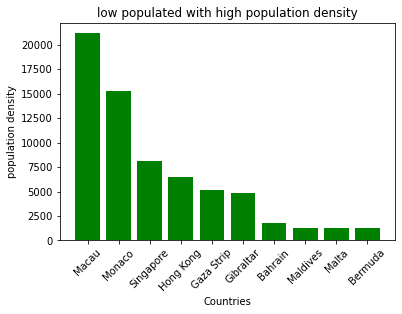

In [18]:
# let's visualize countries with highest density
plt.bar(high_pop_den['name'],high_pop_den['population_density'],color="green")
plt.xticks(rotation=45)
plt.title("low populated with high population density")
plt.xlabel('Countries')
plt.ylabel('population density')
plt.show()

**Macau** has the highest population density of **21168** people per square kilometre followed by **Monaco** and **Singapore**.
Generally,the high population densities are related to **small countries and islands** with a land area below the average(550643.8 km^2) and also their population is below average(32,377,010 people).


![](https://www.mapsofworld.com/world-top-ten/maps/world-top-ten-most-densely-populated-countries-map.jpg)

### 3.2.2 Top 20 countries with high population density and pass the conditions:
* population above average
* land area below average

In [19]:
pop_above_avg = pop_density_df[(pop_density_df["population"] > 32377010.0 ) & (pop_density_df["area_land"] < 550643.8  )]
pop_above_avg 

,name,population,area_land,population_density
13,Bangladesh,168957745,130170.0,1138.07
90,"Korea, South",49115196,96920.0,492.53
137,Philippines,100998376,298170.0,336.66
84,Japan,126919659,364485.0,335.84
191,Vietnam,94348835,310070.0,284.86
184,United Kingdom,64088222,241930.0,263.08
64,Germany,80854408,348672.0,226.47
82,Italy,61855120,294140.0,205.27
181,Uganda,37101745,197100.0,153.92
172,Thailand,67976405,510890.0,132.48


Text(0.5, 1.0, 'highly populated countries with high population density')

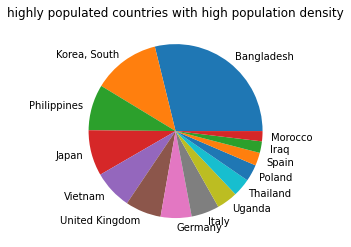

In [20]:
# visualizing countries with high population country
plt.pie(pop_above_avg["population_density"],labels = pop_above_avg["name"])
plt.title("highly populated countries with high population density")

We can conclude that **Bangladesh** has the highest population density of **1138** people per square kilometre.One of the main reasons for high population is a **very fertile region** and has a high **population growth rate**. 

![]()

### 3.2.3 Countries that are sparsely populated and have a land area above average

In [21]:
land_area_above_avg = pop_density_df[pop_density_df["area_land"] > 550643.8 ].sort_values("population_density").head(20)
land_area_above_avg

,name,population,area_land,population_density
206,Greenland,57733,2166086.0,0.03
117,Mongolia,2992908,1553556.0,1.91
121,Namibia,2212307,823290.0,2.68
8,Australia,22751014,7682300.0,2.94
111,Mauritania,3596702,1030700.0,3.49
31,Canada,35099836,9093507.0,3.52
99,Libya,6411776,1759540.0,3.64
22,Botswana,2182719,566730.0,3.75
86,Kazakhstan,18157122,2699700.0,6.66
142,Russia,142423773,16377742.0,8.33


**Greenland** is the most sparsely populated country with **3 people** occupying **100 square kilometres of land**.This may be due to physical factors like extreme temperatures.**Greenland's** 80% land mass is covered by an ice cap and it's the world's biggest island by area.
**Mongolia** is the second most sparsely populated country with **2 persons per square kilometre** of land.The country's low population can be explained in part by its geographic and climatic extremes.It is home to soaring mountains and burning deserts including the Gobi desert.Because of the country's high altitude winters are long and temperatures are extremely high.
**Namibia** is also considered the most sparsely populated country in **Africa** and third in the world with about **3 people per square kilometer of land**.Its sparse population can be explained by its climatic extreme since it is largely covered by the **Namib desert**. 

## 3.3 Exploring population growth statistic
We will start by finding countries with null or zero population growth rate 

In [22]:
pop_growth_df = population_data[["name","population_growth","birth_rate","death_rate","migration_rate"]]
zero_pop_growth_df = pop_growth_df[(pop_growth_df["population_growth"].isna()) | (pop_growth_df["population_growth"] == 0.0)]
zero_pop_growth_df

,name,population_growth,birth_rate,death_rate,migration_rate
91,Kosovo,NaN,NaN,NaN,NaN
206,Greenland,0.0,14.48,8.49,5.98
212,Saint Martin,NaN,NaN,NaN,NaN
224,Akrotiri,NaN,NaN,NaN,NaN
230,Dhekelia,NaN,NaN,NaN,NaN
211,Saint Barthelemy,NaN,NaN,NaN,NaN
189,Holy See (Vatican City),0.0,NaN,NaN,NaN
199,Cocos (Keeling) Islands,0.0,NaN,NaN,NaN
237,Pitcairn Islands,0.0,NaN,NaN,NaN


We see that except for **Greenland**,countries with zero or null population growth record the same for `birth_rate`,`death_rate` and `migration_rate` 

 ### 3.3.1 Top 20 countries with high population growth rate 

In [23]:
pop_growth_df = pop_growth_df.sort_values("population_growth",ascending = False).dropna()
pop_growth_df.head(20)

,name,population_growth,birth_rate,death_rate,migration_rate
161,South Sudan,4.02,36.91,8.18,11.47
105,Malawi,3.32,41.56,8.41,0.00
28,Burundi,3.28,42.01,9.27,0.00
127,Niger,3.25,45.45,12.42,0.56
181,Uganda,3.24,43.79,10.69,0.74
140,Qatar,3.07,9.84,1.53,22.39
26,Burkina Faso,3.03,42.03,11.72,0.00
108,Mali,2.98,44.99,12.89,2.26
79,Iraq,2.93,31.45,3.77,1.62
57,Ethiopia,2.89,37.27,8.19,0.22


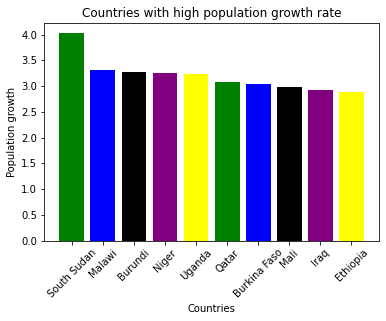

In [24]:
#visualizing countries with high population growth rate
plt.bar(pop_growth_df["name"].head(10),pop_growth_df["population_growth"].head(10),color = ["green","blue","black","purple","yellow"])
plt.xticks(rotation = '45')
plt.xlabel("Countries")
plt.ylabel("Population growth")
plt.title("Countries with high population growth rate")
plt.show()

High population growth is seen mostly in african countries with the first country being **South Sudan**,which has a population growth rate of **4.02** percent.Below is a summary of a [google article](https://theconversation.com/whats-driving-africas-population-growth-and-what-can-change-it-126362) explaining why there is high population growth in Africa.
> The main one is high fertility which is driven by multiple factors, including high desired family size, low levels of use of modern contraceptives, and high levels of adolescent childbearing.


###  3.3.2 Bottom 20 countries with low population growth rate

In [25]:
pop_growth_df = pop_growth_df.sort_values("population_growth").head(20)
pop_growth_df[pop_growth_df["name"] != "Pitcairn Islands"]

,name,population_growth,birth_rate,death_rate,migration_rate
206,Greenland,0.00,14.48,8.49,5.98
66,Greece,0.01,8.66,11.09,2.32
156,Slovakia,0.02,9.91,9.74,0.04
71,Guyana,0.02,15.59,7.32,8.06
175,Tonga,0.03,23.00,4.85,17.84
142,Russia,0.04,11.60,13.69,1.69
63,Georgia,0.08,12.74,10.82,2.70
107,Maldives,0.08,15.75,3.89,12.68
138,Poland,0.09,9.74,10.19,0.46
139,Portugal,0.09,9.27,11.02,2.67


The *lowest population growth* is observed in **small countries and islands** (some of which we've seen earlier in the project).In the above results we see some few countries from **Western Europe**(Greece,Portugal,Andorra,Monaco),**Eastern Europe**(Slovakia,Poland),**Russia** and **Georgia**.

## 3.4 Exploring Birth and Death rate Statistics

### 3.4.1 Top 20 countries with high birth rate

In [26]:
birth_rate_df = population_data[["name","birth_rate"]].sort_values("birth_rate",ascending = False)
birth_rate_df["birth_rate"]=birth_rate_df["birth_rate"].dropna()
birth_rate_df.head(20)

,name,birth_rate
127,Niger,45.45
108,Mali,44.99
181,Uganda,43.79
193,Zambia,42.13
26,Burkina Faso,42.03
28,Burundi,42.01
105,Malawi,41.56
159,Somalia,40.45
4,Angola,38.78
120,Mozambique,38.58


<BarContainer object of 10 artists>

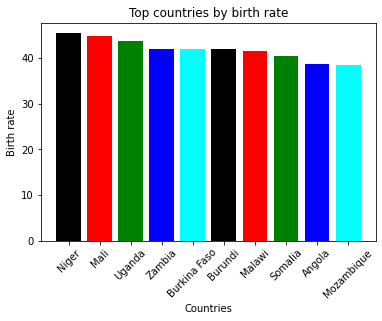

In [27]:
# plotting a visualizatin bar graph
plt.xticks(rotation = '45')
plt.title('Top countries by birth rate')
plt.xlabel('Countries')
plt.ylabel('Birth rate')
plt.bar(birth_rate_df['name'].head(10),
        birth_rate_df['birth_rate'].head(10),color=['black', 'red', 'green', 'blue', 'cyan'])


**Niger** has the highest birth rate of upto 45 births per 1000 persons.Most interesting is that out of the first 20 countries with high birth rate,19 are in **Africa**.This [google article](https://theconversation.com/whats-driving-africas-population-growth-and-what-can-change-it-126362) explains the main reason for high birth rate in African countries is  high fertility which is driven by multiple factors, including high desired family size, low levels of use of modern contraceptives, and high levels of adolescent childbearing.
Other than the African countries,**Afghanistan** also has a high birth rate of 39 births per 1000 persons.This is due to high fertility rate in the country.
Below is a google map showing the birth rates in the world
![](https://upload.wikimedia.org/wikipedia/commons/b/b0/Countries_by_Birth_Rate_in_2017.svg)

### 3.4.2 Bottom 20 countries by birth_rate

In [28]:
birth_rate_df.dropna().tail(20).sort_values("birth_rate")

,name,birth_rate
116,Monaco,6.65
213,Saint Pierre and Miquelon,7.42
84,Japan,7.93
3,Andorra,8.13
90,"Korea, South",8.19
155,Singapore,8.27
157,Slovenia,8.42
64,Germany,8.47
195,Taiwan,8.47
148,San Marino,8.63


**Monaco** has the least population growth of 7 births per 1000 persons.This is because most of its population lives in the urban areas hence have access to primary health care and education.
Low birth rate is also observed in **Asian countries** like **Japan**,**South Korea** and **Singapore** which have upto 8 births per 1000 persons.
Lowest birth rate of upto 7 births per 1000 persons is observed in **Western Europe**(Monaco,Andorra,Germany,Greece,Italy and Portugal).
##                                           Monaco birth rate                             
![](https://fred.stlouisfed.org/graph/fredgraph.png?width=880&height=440&id=SPDYNCBRTINMCO)

##                                             Japan birth rate
![](https://www.theglobaleconomy.com/graph_country.php?p=0&c=Japan&i=birth_rate)

### 3.5 Death rate

### 3.5.1 Top 20 countries with  high death rate

In [29]:
death_rate_df = population_data[["name","death_rate"]].sort_values("death_rate",ascending = False)
death_rate_df.head(20)

,name,death_rate
97,Lesotho,14.89
182,Ukraine,14.46
25,Bulgaria,14.44
70,Guinea-Bissau,14.33
95,Latvia,14.31
34,Chad,14.28
101,Lithuania,14.27
121,Namibia,13.91
0,Afghanistan,13.89
33,Central African Republic,13.80


Lesotho has the highest death rate of upto **14 deaths** per 1000 persons every year.This may be as a result of the effects of the AIDS epidemic on the country.
High death rate is also seen in **Ukraine** due to a `high mortality rate among working-age males from preventable causes such as alcohol consumption and smoking`

### 3.5.2 Bottom 20 countries by death rate

In [30]:
death_rate_df.sort_values("death_rate").dropna().head(20)

,name,death_rate
140,Qatar,1.53
183,United Arab Emirates,1.97
92,Kuwait,2.18
12,Bahrain,2.69
250,Gaza Strip,3.04
240,Turks and Caicos Islands,3.10
150,Saudi Arabia,3.33
130,Oman,3.36
155,Singapore,3.43
253,West Bank,3.50


**Qatar** has the lowest death_rate of 2 deaths per 1000 persons every year.The *lowest death rates* of upto 2 deaths per 1000 persons are mostly related to the **Middle East Countries**.These countries are historically characterized by a **very high living standard**.

Now lets investigate another demographic factor;the natural increase,i.e the difference between the birth and death rates.

## 3.6 Natural increase

### 3.6.1 Top 10 countries by natural increase

In [31]:
population_data["natural_increase"] = population_data["birth_rate"] - population_data["death_rate"]
population_data[["name","natural_increase"]].sort_values("natural_increase",ascending = False).head(10)

,name,natural_increase
105,Malawi,33.15
181,Uganda,33.10
127,Niger,33.03
28,Burundi,32.74
108,Mali,32.10
26,Burkina Faso,30.31
193,Zambia,29.46
57,Ethiopia,29.08
161,South Sudan,28.73
171,Tanzania,28.39


Due to high population growth rate,most of the **African countries** like Uganda,Niger and Burundi have a birth_rate that is far higher than the death rate with **Malawi** topping the list.

### 3.6.2 Bottom 10 countries by natural increase

In [32]:
population_data[["name","natural_increase"]].sort_values("natural_increase").head(10)

,name,natural_increase
25,Bulgaria,-5.52
152,Serbia,-4.58
95,Latvia,-4.31
101,Lithuania,-4.17
182,Ukraine,-3.74
74,Hungary,-3.57
157,Slovenia,-2.95
64,Germany,-2.95
141,Romania,-2.76
43,Croatia,-2.73


The *lowest natural increase* being negative shows a decrease.This is dominated by the **European countries** such as Bulgaria,Serbia,Hungary and Germany.


## 3.7 Exploring Area Statistics

### 3.7.1 Top five largest countries by area

In [33]:
area_df = population_data[["name","area"]].sort_values("area",ascending = False).head()
area_df

,name,area
142,Russia,17098242.0
31,Canada,9984670.0
185,United States,9826675.0
36,China,9596960.0
23,Brazil,8515770.0


<BarContainer object of 5 artists>

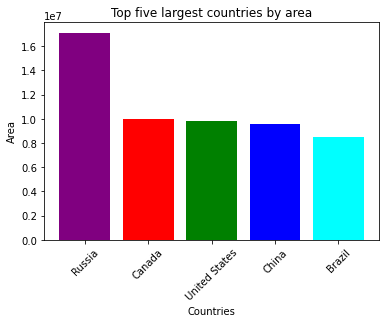

In [34]:
# visualizing the largest countries
plt.xticks(rotation = '45')
plt.title('Top five largest countries by area')
plt.xlabel('Countries')
plt.ylabel('Area')
plt.bar(area_df['name'],
        area_df['area'],color=['purple', 'red', 'green', 'blue', 'cyan'])


**Russia** is the largest country by area with an area of 17098242 square kilometers.It is followed by **Canada**,**United States**,**China** and **Brazil**


### 3.7.2 Bottom five smallest countries by area

In [35]:
population_data[["name","area"]].sort_values("area").head()

,name,area
189,Holy See (Vatican City),0.0
116,Monaco,2.0
232,Gibraltar,6.0
220,Tokelau,12.0
199,Cocos (Keeling) Islands,14.0


**Vatican City** and **Monaco** are the smallest countries with an area size of less than **3 km^2**.**Gibraltar**,**TOkelau** and the **Cocos(Keeling) Islands** have an area of less than **15 km^2**


### 3.7.3 Countries with the highest ratio of water area to land area

In [36]:
population_data["water_to_land"] = population_data["area_water"] / population_data["area_land"]
population_data[["name","area_water","area_land","water_to_land"]].sort_values("water_to_land",ascending = False).head(10)

,name,area_water,area_land,water_to_land
246,Virgin Islands,1564.0,346.0,4.520231
245,Puerto Rico,4921.0,8870.0,0.554791
11,"Bahamas, The",3870.0,10010.0,0.386613
70,Guinea-Bissau,8005.0,28120.0,0.284673
105,Malawi,24404.0,94080.0,0.259396
124,Netherlands,7650.0,33893.0,0.225710
181,Uganda,43938.0,197100.0,0.222922
55,Eritrea,16600.0,101000.0,0.164356
98,Liberia,15049.0,96320.0,0.156240
13,Bangladesh,18290.0,130170.0,0.140509


**Water area** is the sum of the surface areas of all inland water bodies(lakes,reservoirs and rivers) within international boundaries and coastlines.Coastal internal waters may be included.Territorial seas are not included unless otherwise noted.Contiguous zones and exclusive economic zones are not included.
This can be easily seen on the Google maps below.

In **Malawi**,the main water area is covered  **Lake Malawi** and in **Uganda** by **Lake Victoria**(the largest fresh water lake in Africa).
In **Netherlands**,the main water area is covered by two large artificial fresh-water lakes;**Markermeer** and **Ijsselmeer**

## 3.8 Exploring migration rate statistic

### 3.8.1 Top countries with highest migration rate

In [37]:
population_data[["name","migration_rate"]].sort_values("migration_rate",ascending = False).head()

,name,migration_rate
140,Qatar,22.39
241,American Samoa,21.13
114,"Micronesia, Federated States of",20.93
169,Syria,19.79
175,Tonga,17.84


**Qatar** has the highest migration rate.The main reason is that it has a high number of stable job opportunities.It also legislates a basic minimum wage for all workers regardless of their nationality and their legal status in the country.[Click here](https://www.hrw.org/news/2021/08/02/migrant-workers-and-qatar-world-cup) for more information.

### 3.8.2 Top countries with least migration rate

In [38]:
population_data[["name","migration_rate"]].sort_values("migration_rate").head()

,name,migration_rate
236,Montserrat,0.0
253,West Bank,0.0
90,"Korea, South",0.0
6,Argentina,0.0
98,Liberia,0.0


# Conclusion
In this project,we have analyzed various demographic and geographic statistics for all the countries in the world.
Below are our main findings:
* The countries with the largest **population** are China,India ,the United States,Indonesia and Brazil.
* The most **densely populated** countries are Macau,Monaco,Singapore and Hong Kong;From bigger countries we have Bangladesh and South Korea.
* The most **sparsely populated** countries are Greenland,Mongolia,Namibia and Australia.
* **Population dynamics**:
   * **African countries** have the highest birth and population growth rates.However,the birth rates are much higher than      the death rates resulting to the highest values of natural increase and population growth in the world.
   * In **Western Europe**,countries like Monaco,Andorra,Germany,Greece,Italy and Portugal show relatively lower birth          rates than death rates leading to a negative natural increase and as a result,low population growth.However,in            Germany and Italy the negative natural increase seems to be compensated by the immigration and hence their population      growth rate is not amog the least.
   * Countries in the **Middle East** have the lowest death rates in the world.
* **Area**:The largest countries by area are Russia,Canada,the United States,China and Brazil.
           The smallest ones are Vatican City and Monaco.
* The countries characterized by the highest watet-to-land area ratio,considering only enclosed fresh waters are **Malawi**(Lake Malawi),**Netherlands**(artificial lakes Markermeer and IJsselmeer) and **Uganda**(Lake Victoria)
* The country with the highest migration rate is **Qatar** due to stable job opportunities.

# Recommendations

**For a country to sustain its citizens it has to control its population.This reduces poverty and marginalization levels especially in the developing countries most of which are in Africa.** 
### To reduce birth and population growth rate in developing countries(most of which are African) I recommend the following:
* Improved Educational Opportunities for Women:This leads to higher use of contraceptives,better childhood health and women's participation in the workforce.
* Lower Child Mortality:High child mortality — including infant deaths and deaths by early childhood illnesses — keeps population growth low and fertility rates high. As child mortality rates have declined (dramatically in some countries) fertility rates have fallen.
* Better Access to Contraception and Family Planning Advice:Declines in fertility rates  come from the introduction of safe, reliable access to contraception. This may include confidential access if local cultural norms or family members impede a woman's right to access birth control. The increased availability of sexual health education and family planning resources has also impacted fertility rates.
* Increasing Societal Prosperity:More prosperity is fostered by a higher level of education hence a lower number of children.Most people in wealthier regions prefer marrying and having children later in life since they are pursuing their careers.
 
## Reducing death rate
This may be done by improving the health standards of a country and offering care for the elderly in the population

### Reducing migration rate.
Search for employment opportunities,health care services,higher education and war are the main reasons for migration of citizens out of a country.
To control this,the country must consider offering more job opportunities especially to the youth,improve its health care and education standards.

